In [37]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [5]:
print('Length of train data: {}'.format(len(train_data)))
print('Length of test data: {}'.format(len(test_data)))

Length of train data: 8982
Length of test data: 2246


In [11]:
#length of examples are not same
print('Length of example 1: {}'.format(len(train_data[0])))
print('Length of example 2: {}'.format(len(train_data[1])))

Length of example 1: 87
Length of example 2: 56


In [14]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [16]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
'''
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
'''

'\none_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)\n'

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))                    

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 176us/step - loss: 2.8698 - acc: 0.4899 - val_loss: 1.9036 - val_acc: 0.6230
Epoch 2/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.5273 - acc: 0.6923 - val_loss: 1.3317 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.0852 - acc: 0.7672 - val_loss: 1.1318 - val_acc: 0.7650
Epoch 4/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.8442 - acc: 0.8250 - val_loss: 1.0401 - val_acc: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.6745 - acc: 0.8649 - val_loss: 0.9698 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.5388 - acc: 0.8923 - val_loss: 0.9270 - val_acc: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.4421 - acc: 0.9119 - val_loss: 0.9236 - val_acc: 0.8080


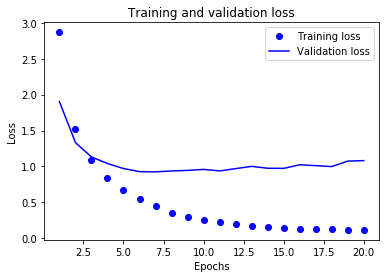

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

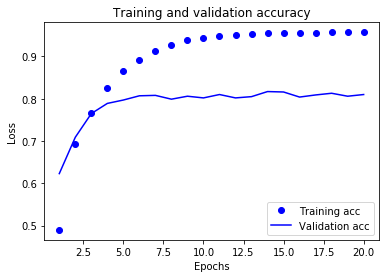

In [39]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [43]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 123us/step
[1.1821611398899015, 0.7818343722703515]
